# Models evaluation: *loss* and *acc* analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In this notebook we will analyze the experiments we have made and the results of the *Kaggle* competition obtained.

This initial function will help us to obtain the *min_val_loss* and *max_val_acc* rows for each saved history. So we will be able to build 2 data frames, one considering the *min_val_loss* and the other considering *max_val_acc* that found each model during its training.<br>
This data is recovered from the histories saved at the moment of training each model.

In [11]:
def get_loss_acc(history):
    hist = history
    epochs = range(1, len(hist['loss']) + 1)
    val_acc_s = "val_acc"
    acc = "acc"
    if(val_acc_s not in hist):
        acc = "categorical_accuracy"
        val_acc_s="val_categorical_accuracy"
        
    val_loss = hist['val_loss']
    min_val_loss = min(val_loss)
    min_val_loss_idx = val_loss.index(min_val_loss)    
    min_val_loss_row = [min_val_loss, hist[val_acc_s][min_val_loss_idx], hist['loss'][min_val_loss_idx], hist[acc][min_val_loss_idx], epochs[min_val_loss_idx]]

    val_acc = hist[val_acc_s]
    max_val_acc = max(val_acc)
    max_val_acc_idx = val_acc.index(max_val_acc)
    max_val_acc_row = [hist['val_loss'][max_val_acc_idx], max_val_acc, hist['loss'][max_val_acc_idx], hist[acc][max_val_acc_idx], epochs[max_val_acc_idx]]

    return (min_val_loss_row, max_val_acc_row)     

In [4]:
models_dir = './models'
hist_dir = './hist' 

We go through each history in the *hist* folder and obtain the two already mentioned dataframes.

In [5]:
min_val_loss_d = []
max_val_acc_d = []
histories = os.listdir(hist_dir)
for h in histories:
    hist = np.load(f'{hist_dir}/{h}',allow_pickle=True).item()
    min_val_loss_row, max_val_acc_row = get_loss_acc(hist)
    min_val_loss_row.append(h)
    max_val_acc_row.append(h)
    min_val_loss_d.append(min_val_loss_row)
    max_val_acc_d.append(max_val_acc_row)

min_val_loss_df = pd.DataFrame(min_val_loss_d,columns=['val_loss','val_acc','loss','acc','epoch','model'])
max_val_acc_df = pd.DataFrame(max_val_acc_d,columns=['val_loss','val_acc','loss','acc','epoch','model'])

Two columns will be calculated and added for each dataframe, the mean of *loss* and *val_loss* and the mean of *acc* and *val_acc*

In [12]:
min_val_loss_df
min_val_loss_df['mean_loss'] = ( min_val_loss_df['loss'] + min_val_loss_df['val_loss'] ) / 2
min_val_loss_df['mean_acc'] = ( min_val_loss_df['acc'] + min_val_loss_df['val_acc'] ) / 2

In [13]:
max_val_acc_df['mean_loss'] = ( max_val_acc_df['loss'] + max_val_acc_df['val_loss'] ) / 2
max_val_acc_df['mean_acc'] = ( max_val_acc_df['acc'] + max_val_acc_df['val_acc'] ) / 2

The dataset considering the *min_val_loss* shows us the different results obtained with the 22 saved histories.<br>
The mimimum val_loss was 0.543526 with a val_acc of 0.81, those values were obtained with an architecture considering 3 Hidden layers [8,16,32] (quantity of neurons in each layer) and ReLu as activation function of each one.<br>
On the other hand, the highest val_loss was 0.788289 with a val_acc of 0.65 considering an architecture of 2 Hidden layers [4,8], Sigmoid as activation function of each one and Adam as optimizer. 

In [9]:
min_val_loss_df.sort_values(['val_loss'],ascending=True)

,val_loss,val_acc,loss,acc,epoch,model,mean_loss,mean_acc
19,0.543526,0.813471,0.282338,0.879377,861,M_29F_8_16_32_ReLu.npy,0.412932,0.846424
5,0.547296,0.839378,0.232231,0.891051,463,M_29F_16_32_ReLu_P2.npy,0.389763,0.865214
2,0.562321,0.829016,0.249541,0.878080,952,M_29F_16_32_ReLu.npy,0.405931,0.853548
4,0.583930,0.751295,0.406951,0.826200,1808,M_29F_16_32_ReLu_Dropout025.npy,0.495441,0.788748
15,0.589589,0.787565,0.290717,0.880674,374,M_29F_32_32_ReLu_Sig_P2.npy,0.440153,0.834120
0,0.591001,0.808290,0.262262,0.889754,1118,M_29F_128_ReLu.npy,0.426631,0.849022
17,0.600256,0.813471,0.276547,0.884565,1202,M_29F_64_ReLu.npy,0.438402,0.849018
18,0.605560,0.803109,0.252225,0.889754,899,M_29F_64_Sig_Adam.npy,0.428892,0.846431
8,0.614376,0.823834,0.220732,0.897536,1548,M_29F_16_32_Sig_Adam.npy,0.417554,0.860685
13,0.616346,0.797927,0.285299,0.885863,454,M_29F_32_32_ReLu.npy,0.450823,0.841895


The dataset considering the *max_val_acc* shows us the different results obtained with the 22 saved histories.<br>
The maximum val_acc was 0.865285 with a val_loss of 0.67, those values were obtained with an architecture considering 3 Hidden layers [8,16,32] and ReLu as activation function of each one.<br>
On the other hand, the lowest val_acc was 0.673575 with a val_loss of 0.79 considering an architecture of 2 Hidden layers [4,8], Sigmoid as activation function of each one and Adam as optimizer. 

In [8]:
max_val_acc_df.sort_values(['val_acc'],ascending=False)

,val_loss,val_acc,loss,acc,epoch,model,mean_loss,mean_acc
19,0.674002,0.865285,0.234462,0.881971,2253,M_29F_8_16_32_ReLu.npy,0.454232,0.873628
12,0.685200,0.854922,0.237231,0.887160,990,M_29F_32_16_ReLu.npy,0.461215,0.871041
10,0.643798,0.849741,0.226810,0.888457,1332,M_29F_16_32_Tanh.npy,0.435304,0.869099
2,0.599544,0.849741,0.238393,0.891051,964,M_29F_16_32_ReLu.npy,0.418969,0.870396
5,0.580024,0.849741,0.226556,0.891051,487,M_29F_16_32_ReLu_P2.npy,0.403290,0.870396
0,0.599178,0.844560,0.241084,0.897536,1483,M_29F_128_ReLu.npy,0.420131,0.871048
13,0.662656,0.844560,0.243291,0.892348,734,M_29F_32_32_ReLu.npy,0.452973,0.868454
11,0.940278,0.844560,0.220493,0.892348,1902,M_29F_16_64_Sigmoid_Adam.npy,0.580385,0.868454
8,0.617391,0.839378,0.223504,0.894942,1509,M_29F_16_32_Sig_Adam.npy,0.420448,0.867160
1,0.797564,0.839378,0.250856,0.892348,1101,M_29F_16_16_ReLu.npy,0.524210,0.865863


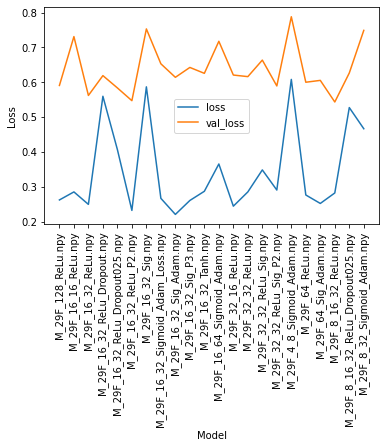

In [10]:
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(min_val_loss_df.index,labels=min_val_loss_df['model'],rotation=90)
for x in ['loss','val_loss']:
    plt.plot(min_val_loss_df[x])
plt.legend(['loss','val_loss'])
plt.show()

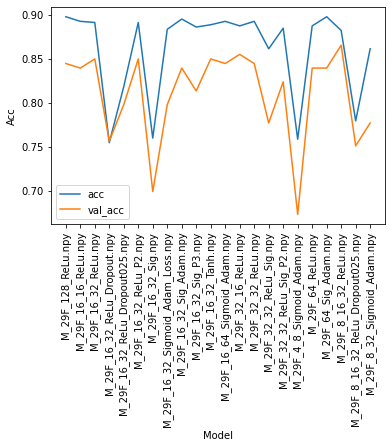

In [14]:
plt.xlabel('Model')
plt.ylabel('Acc')
plt.xticks(max_val_acc_df.index,labels=max_val_acc_df['model'],rotation=90)
for x in ['acc','val_acc']:
    plt.plot(max_val_acc_df[x])
plt.legend(['acc','val_acc'])
plt.show()

Now we would like to analyze the results we obtained with some of the models which predictions were uploaded to the *Kaggle* competition.

<img src="./kaggle_performance.jpg" width=500>

1. We thought model *M_29F_8_16_32_Relu* was the best one, because it had the minimum *val_loss* (considering only val_loss) value and it also had the maximum *val_acc* (considering only val_acc). The prediction was made based on the minimum val_loss but it turned out to be the prediction with the lowest private score and the lowest mean (Private+Public)/2. So we can say that there was a problem of *Over fitting* because it didn´t work good for the test.
2. The model that adjusted better and gave better results in private and public scores was the *M_29F_32_16_ReLu* which prediction was based on the minimum *val_loss* which was 0.620882, the val_acc 0.844560 found in 793 epochs with a default optimizer *SGD*.
3. The models *M_29F_16_32_TanH* and *M_29F_16_32_ReLu* based on the minimum *val_loss* gave exactly the same score for public and private. *M_29F_16_32_TanH* had a val_loss of 0.625790, the val_acc 0.777202 found in 635 epochs with the variant of activation function *tanh* and a default optimizer *SGD*. *M_29F_16_32_ReLu* had a val_loss of 0.562321, the val_acc 0.829016 found in 952 epochs, this val_loss was one of the minimum found, so this model worked good for both training and test data. 
4. The model *M_29F_16_32_ReLu_P2* was a second training of the previous model.
5. The model *M_29F_16_32_ReLu_P2_acc* was based on the maximum *val_acc* which val_loss was 0.580024, val_acc 0.849741 found in 487 epochs. This was the model with the highest fifth val_acc, but in average it didn't work as well as the other predictions. 
6. The model *M_29F_128_ReLu* based on the minimum *val_loss* had a val_loss of 0.591001, val_acc 0.808290 found in 1118 epochs. This val_loss was the lowest sixth val_loss, but it didn't work that well for the test data. 

For clarification:
We have used *based on minimum val_loss* and *based on maximum val_acc* many times. That's why we proposed 2 models for each experiment. The first model added values to the history only if the *test_error = val_loss* was decreasing, when this value started incresing, those values were not saved to the history. → We are only saving the minimum values of *val_loss*. 
When we say *base on maximum val_acc* we make reference to the second proposed model, this model added values to the history only if the *val_acc* was increasing. → We are only saving the maximum values of *val_acc*. 

We test a lot of architectures and variations, and we found acceptable models. In every training we try to avoid the overfitting choosing the model with min *val_loss* and *loss*. Although the models didn't generalize the behavior of the available data as well as the Kaggle hidden data. But it was very acceptable. 

In most of our submissions our predictions were based on the *minimum val_loss* and maybe we didn't found the best results but we found an acceptable model. For sure there are more techniques we could apply to improve the architecture, like Feature Selection, hence this dataset contained a lot of features, some of them might not be relevant when making the prediction. 